A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

### Import the necessary libraries

In [4]:
# Tensorflow module for deep learning models
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models

# For data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

### Load the dataset

In [5]:
#Assign the dataset to a variable
mnist_digits = datasets.mnist.load_data()

#Split the data
(train_images, train_labels), (test_images, test_labels) = mnist_digits

11493376/11490434 [==============================] - 1s 0us/step


### Check data shape

In [6]:
print('train_images shape:', train_images.shape)
print('train_labels shape:', train_labels.shape)
print('\ntest_images shape:', test_images.shape)
print('test_labels shape:', test_labels.shape)

train_images shape: (60000, 28, 28)
train_labels shape: (60000,)

test_images shape: (10000, 28, 28)
test_labels shape: (10000,)


### Reshape images

In [35]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

### Visualize the data

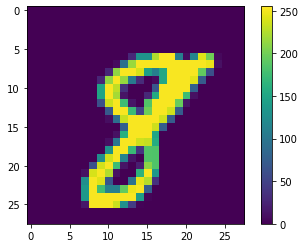

In [36]:
plt.figure()
plt.imshow(train_images[55])
plt.colorbar()
plt.grid(False)
plt.show()

## Create the model and train it

In [37]:
# Assign the model to a variable
model = models.Sequential()

# Add layers to it
# 1- a convolutional layer with 8 inputs
model.add(layers.Conv2D(filters=8,
                        kernel_size=(3,3),
                        input_shape=(28, 28, 1),
                        padding='same'))

# 2- a Maxpool layer that reduces image shape to half
model.add(layers.MaxPooling2D((2, 2)))

# 3- a Dropout layer of 0.25
model.add(layers.Dropout(0.25))

# 4- Flatten
model.add(layers.Flatten())

# 5- a Dense layer with 32 neurons
model.add(layers.Dense(32, activation='relu'))

# 6- a Dense output layer with 10 neurons
    # REMEMBER: softmax is the activation function that is always used in output layers for classification
model.add(layers.Dense(10, activation='softmax'))

### Summarize the model to see if all parameters are well defined

In [38]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                50208     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 50,618
Trainable params: 50,618
Non-trainable params: 0
__________________________________________________

### Config the model with losses and metrics

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [40]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3131 - accuracy: 0.6108
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3849 - accuracy: 0.9037
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9348
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1867 - accuracy: 0.9493
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1611 - accuracy: 0.9544
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1471 - accuracy: 0.9565
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1292 - accuracy: 0.9623
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1275 - accuracy: 0.9617
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1202 - accuracy: 0.9655
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.115

### Evaluate model performance

In [41]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc, "\nLoss:", test_loss)

313/313 - 1s - loss: 0.0951 - accuracy: 0.9723

Test accuracy: 0.9722999930381775 
Loss: 0.09511595219373703


## This model seems to be quite accurate

# Now, let's try with another model

In [51]:
model_2 = models.Sequential()
# Add the necessary layers
# 1. Convolutional layers with 8 neurons
model_2.add(layers.Conv2D(filters=8,
                        kernel_size=(3,3),
                        input_shape=(28, 28, 1),
                        padding='same'))

# 2- a Maxpool layer that reduces image shape to half
model_2.add(layers.MaxPooling2D((2, 2)))

# 3- a Dropout layer of 0.25
model_2.add(layers.Dropout(0.25))

# 4- Flatten
model_2.add(layers.Flatten())

# 5- a Dense layer with 16 neurons
model_2.add(layers.Dense(16, activation='relu'))

# 6- a Dense layer with 32 neurons
model_2.add(layers.Dense(32, activation='relu'))

# 7- a Dense output layer with 10 neurons
    # REMEMBER: softmax is the activation function that is always used in output layers for classification
model_2.add(layers.Dense(10, activation='softmax'))

In [52]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 16)                25104     
_________________________________________________________________
dense_18 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_19 (Dense)             (None, 10)              

In [53]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
model_2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2669 - accuracy: 0.4116
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4313 - accuracy: 0.8708
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9158
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2297 - accuracy: 0.9304
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2037 - accuracy: 0.9395
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1843 - accuracy: 0.9442
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1689 - accuracy: 0.9480
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1567 - accuracy: 0.9533
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1523 - accuracy: 0.9536
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.144

In [55]:
test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc, "\nLoss:", test_loss)

313/313 - 0s - loss: 0.1198 - accuracy: 0.9654

Test accuracy: 0.965399980545044 
Loss: 0.11984683573246002


### In this case, after introducing a new layer with 16 neurons, the score has decreased and the loss has increased. It will be advisable to remove that layer because maybe the model is overfitting